# Predicting Interest Rate Movements in the Canadian Economy Using Macroeconomic Indicators

## Alireza Anzali
### BrainStation Data Science Course Capstone Project | October 2024

---

## Project Overview
This project aims to develop a predictive model to forecast future interest rate movements in the Canadian economy. The model uses macroeconomic indicators such as historical interest rates, inflation (CPI), GDP growth, and unemployment rates to understand how these variables impact changes in interest rates. The final goal is to gain insights into potential economic shifts to support data-driven policy and financial decisions.


### Importance of Predicting Interest Rate Movements

- **Policy Decision-Making**: Accurate predictions help central banks like the Bank of Canada make informed decisions on adjusting rates to control inflation or stimulate economic growth, ensuring economic stability.

- **Consumer Impact**: Interest rate changes influence borrowing costs for mortgages, loans, and credit. Predicting these changes allows individuals and businesses to plan better financial strategies.

- **Investment Strategies**: Investors rely on interest rate forecasts to manage risks and optimize their portfolios across bonds, equities, and commodities.

- **Economic Forecasting**: Interest rate trends serve as indicators of economic health. Rising rates can signal inflation control efforts, while falling rates might suggest economic slowdowns.

- **Global Trade and Cross-Border Investments**: Interest rates affect exchange rates, influencing trade and cross-border investments. Predicting rate changes allows businesses and investors to forecast currency fluctuations and adjust their strategies.



---


## Datasets and Sources
- **Interest Rate History**  
  The target variable, representing the Bank of Canada’s policy rates over time, which impact consumer borrowing, investment, and economic stability. Available monthly from 1935.

- **Consumer Price Index (CPI)**  
  An inflation measure that tracks the average change in prices paid by consumers over time. Inflation directly influences interest rate decisions. Available monthly from 1914.

- **Gross Domestic Product (GDP) Growth**  
  The measure of economic health, reflecting the value of goods and services produced. Strong growth may prompt interest rate hikes to prevent inflation. Available monthly from 1997 to 2024.

- **Unemployment Rate**  
  Reflects the labor market’s strength, where low unemployment typically signals economic growth, affecting interest rate decisions. Available monthly from 1976.

- **Commodity Price Index (Oil - Energy)**  
  Tracks changes in oil and energy prices, serving as a key economic indicator for Canada’s resource-driven economy. Fluctuations in oil prices significantly influence overall growth and investment patterns. Available monthly from 1972.

- **Monetary Aggregates (M2)**  
  Represents the money supply (including cash, deposits, and easily liquidated assets) and is a key indicator of economic activity. Higher M2 levels may reflect increased liquidity in the economy, potentially impacting inflation and interest rates. Available monthly from 1996.

- **Home Price Index**  
  Housing market prices are highly sensitive to interest rates, as mortgage costs affect affordability and demand. Available monthly from 2005.

- **2-Year Government Bond Yield**
  Reflects investor expectations of near-term interest rate changes and serves as a short-term benchmark for borrowing costs. Movements in the 2-year yield can signal shifts in monetary policy, impacting economic growth. Available monthly from 2001.

- **10-Year Government Bond Yield**
  Indicates long-term interest rate expectations and is often associated with economic growth and inflation expectations. The 10-year yield serves as a reference rate for long-term investments, influencing mortgage rates, corporate borrowing, and economic planning. Available monthly from 2001.

- **US Federal Reserve Interest Rate**
  Represents the benchmark interest rate set by the US Federal Reserve, impacting global financial markets and influencing Canadian interest rates due to close economic ties. Changes in this rate affect cross-border trade, investment, and economic outlook in Canada. Available monthly from 1954.

- **Foreign Exchange Rates (USD/CAD)**  
  Reflects the exchange rate between the Canadian dollar (CAD) and the US dollar (USD) influences trade and investment, indirectly affecting interest rates. Available monthly from 1999.

## Data Sources
- **Bank of Canada**:  
  - [Canada Historical Interest Rates](https://www.bankofcanada.ca/core-functions/monetary-policy/key-interest-rate/)
  - [Commodity Price Index](https://www.bankofcanada.ca/rates/price-indexes/bcpi/)
  - [Bond Yields](https://www.bankofcanada.ca/rates/interest-rates/canadian-bonds/)
  - [Foreign Exchange Rates](https://www.bankofcanada.ca/rates/exchange/monthly-exchange-rates/)
  - [Monetary Aggregates](https://www.bankofcanada.ca/rates/indicators/key-variables/monetary-aggregates/)
  
- **Statistics Canada**:  
  - [Consumer Price Index (CPI)](https://www150.statcan.gc.ca/n1/pub/71-607-x/2018016/cpilg-ipcgl-eng.htm)
  - [Gross Domestic Product (GDP)](https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=3610043402)
  - [Labour Force Survey (Employment Rate)](https://www150.statcan.gc.ca/n1/daily-quotidien/241011/dq241011a-eng.htm?HPA=1&indid=3587-2&indgeo=0)

- **The Canadian Real State Association**:
  - [Home Price Index](https://stats.crea.ca/en-CA/)

- **US Federal Reserve**:
  - [US Federal Reserve Interest Rates](https://www.federalreserve.gov/datadownload/Choose.aspx?rel=H15)
---


## Getting Started
Let’s begin by importing the necessary libraries and loading the datasets for analysis.

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, root_mean_squared_error
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, ConfusionMatrixDisplay,matthews_corrcoef, cohen_kappa_score
from sklearn.preprocessing import label_binarize
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

## Adding datasets

### Canada Interest Rates (Target Dataset)
Let's begin by loading the Target Dataset containing historical interest rates and inspecting the data:
Now, let's load the Target Dataset (Historical Interest Rates) and inspect it:

In [97]:
interest_rate_data = pd.read_csv('data/interest_rate_history_193501.csv')

# Display the first few rows of the dataset
interest_rate_data.head()

,Date,Rate
0,01-Jan-35,2.50
1,01-Jan-44,1.58
2,01-Jan-45,1.50
3,01-Jan-50,1.62
4,01-Jan-51,2.00


#### Problem with Date Parsing
The dataset has a date parsing issue: 01-Jan-35 is interpreted as 2035 instead of 1935. To correct this, we’ll define a function to adjust dates according to the following rules:

- Dates from 2035–2999 should refer to 1935–1999.
- Dates from 1935–1999 remain unchanged.

In [98]:
# Define a function to parse dates correctly
def correct_date_1(date_str):
    # Parse the date string to a datetime object
    dt = pd.to_datetime(date_str, format='%d-%b-%y', errors='coerce')

    # Adjust year based on the specified conditions
    if dt.year >= 2035 and dt.year <= 2999:
        return dt.replace(year=dt.year - 100)  # Adjust 2035-2999 to 1935-1999
    return dt  # Keep years 1935-1999 unchanged

# Apply the function to convert the 'Date' column
interest_rate_data['Date'] = interest_rate_data['Date'].apply(correct_date_1)

# Set the 'Date' column as the index
interest_rate_data.set_index('Date', inplace=True)

# Check the updated dataframe
interest_rate_data.head()


,Rate
Date,
1935-01-01,2.50
1944-01-01,1.58
1945-01-01,1.50
1950-01-01,1.62
1951-01-01,2.00


#### Analysis of Rate Changes
Our Data is good now. This data shows changes in rates, but the rate does not increase or decrease steeply; it remains constant for certain periods. To represent this accurately and allow for correlation with other monthly features, we should create a monthly change DataFrame. This new DataFrame will include the last rate of each month and a new classified column that indicates whether the rate compared to the previous month has "unchanged", "decreased", or "increased."

#### Creating the Monthly Change DataFrame:

In [99]:
# Resample to get the last rate of each month, removing the day component
df = interest_rate_data.resample('ME').last()  # Use 'ME' for month-end frequency

# Fill NaN rates with the previous rate (unchanged)
df['Rate'] = df['Rate'].ffill()  # Forward fill the NaN values

# Create a new column for rate change classification
df['Change'] = df['Rate'].diff()

# Classify the changes
df['Class'] = 'unchanged'  # Default classification
df.loc[df['Change'] > 0, 'Class'] = 'increased'
df.loc[df['Change'] < 0, 'Class'] = 'decreased'
df['Class'] = df['Class'].astype('category')

# Drop the 'Change' column if not needed in the final DataFrame
df.drop(columns='Change', inplace=True)

# Reset the index to turn the index back into a column and eliminate the day part from the date
df.index = df.index.to_period('M')

# Rename columns for clarity
df.columns = ['Canada_Interest_Rate', 'Class']

# Set the final DataFrame's index to the Date
df.index.name = 'Date'

# Display the final DataFrame
df.head(15)

,Canada_Interest_Rate,Class
Date,,
1935-01,2.5,unchanged
1935-02,2.5,unchanged
1935-03,2.5,unchanged
1935-04,2.5,unchanged
1935-05,2.5,unchanged
1935-06,2.5,unchanged
1935-07,2.5,unchanged
1935-08,2.5,unchanged
1935-09,2.5,unchanged


The following plot illustrates the monthly interest rates:

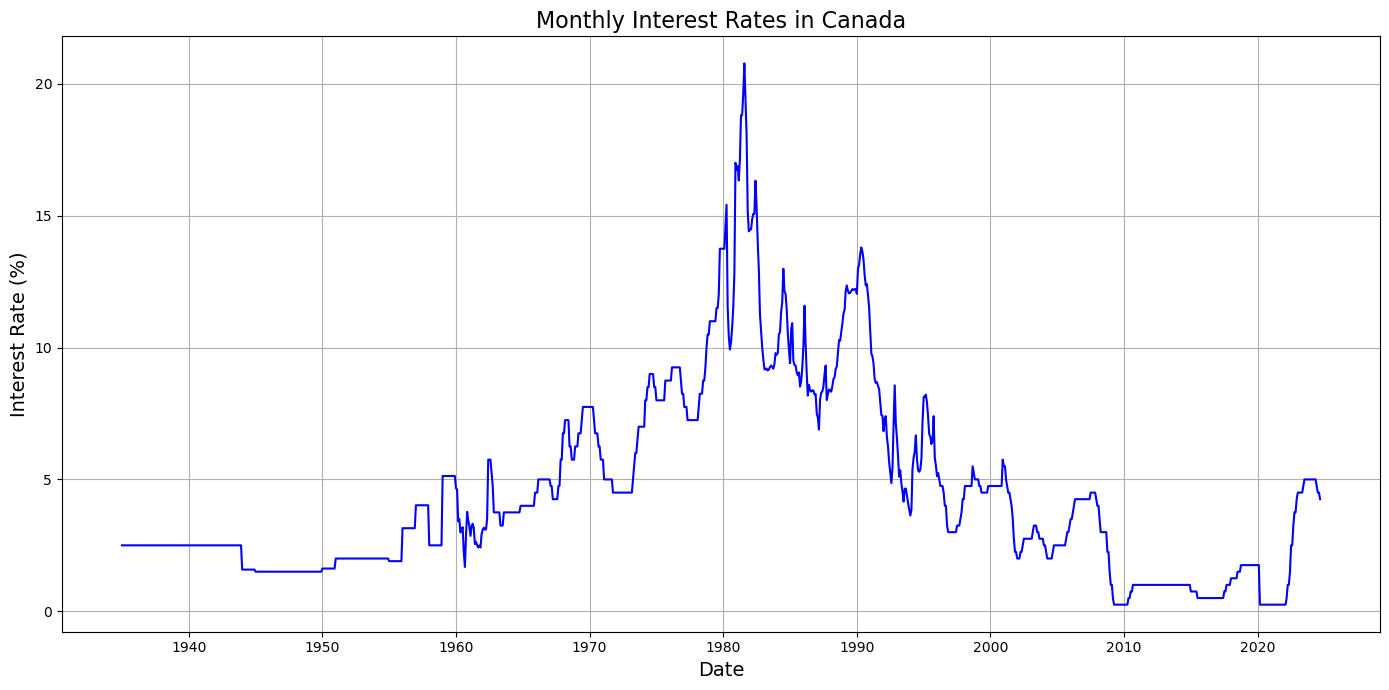

In [100]:
# Plotting the Interest Rate
plt.figure(figsize=(14, 7))
plt.plot(df.index.to_timestamp(), df['Canada_Interest_Rate'], linestyle='-', color='b')

# Adding labels and title
plt.title("Monthly Interest Rates in Canada", fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Interest Rate (%)", fontsize=14)
plt.grid()

# Show the plot
plt.tight_layout()
plt.show()


### Consumer Price Index (CPI)
With our initial DataFrame set up, we can now enhance our model by incorporating more features. We'll begin by adding the Consumer Price Index (CPI):

In [101]:
# Load each sheet into a separate DataFrame
cpi_index = pd.read_excel("data/monthly_cpi_191409.xlsx", sheet_name="CPI_Index")
cpi_12m_change = pd.read_excel("data/monthly_cpi_191409.xlsx", sheet_name="CPI_12M_Change")
cpi_1m_change = pd.read_excel("data/monthly_cpi_191409.xlsx", sheet_name="CPI_1M_Change")

# Display the first few rows of each DataFrame
print("CPI_Index DataFrame:")
print(cpi_index.head())
print("\nCPI_12M_Change DataFrame:")
print(cpi_12m_change.head())
print("\nCPI_1M_Change DataFrame:")
print(cpi_1m_change.head())

# Ensure date columns are parsed correctly and converted to monthly periods
cpi_index['Date'] = pd.to_datetime(cpi_index['date']).dt.to_period('M')
cpi_12m_change['Date'] = pd.to_datetime(cpi_12m_change['date']).dt.to_period('M')
cpi_1m_change['Date'] = pd.to_datetime(cpi_1m_change['date']).dt.to_period('M')

# Ensure number columns are parsed correctly
cpi_index['CPI_Index'] = pd.to_numeric(cpi_index['CPI_Index'], errors='coerce')
cpi_12m_change['CPI_12M_Change'] = pd.to_numeric(cpi_12m_change['CPI_12M_Change'], errors='coerce') 
cpi_1m_change['CPI_1M_Change'] = pd.to_numeric(cpi_1m_change['CPI_1M_Change'], errors='coerce')

# Remove 'date' column to avoid redundancy
cpi_index.drop(columns='date', inplace=True)
cpi_12m_change.drop(columns='date', inplace=True)
cpi_1m_change.drop(columns='date', inplace=True)

# Set 'Date' as the index for each CPI DataFrame
cpi_index.set_index('Date', inplace=True)
cpi_12m_change.set_index('Date', inplace=True)
cpi_1m_change.set_index('Date', inplace=True)

# Merge each CPI DataFrame with the main DataFrame on 'Date' using an outer join
df = df.merge(cpi_index, how='outer', left_index=True, right_index=True)
df = df.merge(cpi_12m_change, how='outer', left_index=True, right_index=True)
df = df.merge(cpi_1m_change, how='outer', left_index=True, right_index=True)

# Display dataframe
df

CPI_Index DataFrame:
        date  CPI_Index
0 2024-09-01      161.1
1 2024-08-01      161.8
2 2024-07-01      162.1
3 2024-06-01      161.4
4 2024-05-01      161.5

CPI_12M_Change DataFrame:
        date CPI_12M_Change
0 2024-09-01            1.6
1 2024-08-01              2
2 2024-07-01            2.5
3 2024-06-01            2.7
4 2024-05-01            2.9

CPI_1M_Change DataFrame:
        date  CPI_1M_Change
0 2024-09-01           -0.4
1 2024-08-01           -0.2
2 2024-07-01            0.4
3 2024-06-01           -0.1
4 2024-05-01            0.6


,Canada_Interest_Rate,Class,CPI_Index,CPI_12M_Change,CPI_1M_Change
Date,,,,,
1914-09,NaN,NaN,6.0,NaN,0.0
1914-10,NaN,NaN,6.1,NaN,1.7
1914-11,NaN,NaN,6.1,NaN,0.0
1914-12,NaN,NaN,6.1,NaN,0.0
1915-01,NaN,NaN,6.1,1.7,0.0
...,...,...,...,...,...
2024-05,5.00,unchanged,161.5,2.9,0.6
2024-06,4.75,decreased,161.4,2.7,-0.1
2024-07,4.50,decreased,162.1,2.5,0.4


### Gross Domestic Product (GDP):
To include GDP data:

In [102]:
# Load the GDP data from the specified sheet
gdp_data = pd.read_csv("data/monthly_gdp_199701_202408.csv", low_memory=False)


# Display the first few rows of the dataset
gdp_data.head()

,REF_DATE,GEO,DGUID,Seasonal adjustment,Prices,North American Industry Classification System (NAICS),UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,1997-01,Canada,2016A000011124,Seasonally adjusted at annual rates,Chained (2017) dollars,All industries [T001],Dollars,81,millions,6,v65201210,1.1.1.1,1204015.0,NaN,NaN,NaN,0
1,1997-01,Canada,2016A000011124,Seasonally adjusted at annual rates,Chained (2017) dollars,Goods-producing industries [T002],Dollars,81,millions,6,v65201211,1.1.1.2,383199.0,NaN,NaN,NaN,0
2,1997-01,Canada,2016A000011124,Seasonally adjusted at annual rates,Chained (2017) dollars,Service-producing industries [T003],Dollars,81,millions,6,v65201212,1.1.1.3,815573.0,NaN,NaN,NaN,0
3,1997-01,Canada,2016A000011124,Seasonally adjusted at annual rates,Chained (2017) dollars,Business sector industries [T004],Dollars,81,millions,6,v65201213,1.1.1.4,NaN,..,NaN,NaN,0
4,1997-01,Canada,2016A000011124,Seasonally adjusted at annual rates,Chained (2017) dollars,"Business sector, goods [T005]",Dollars,81,millions,6,v65201214,1.1.1.5,NaN,..,NaN,NaN,0


In [103]:
# Ensure the date column is parsed correctly and converted to monthly periods
gdp_data['Date'] = pd.to_datetime(gdp_data['REF_DATE']).dt.to_period('M')

# Filter the data
gdp_data = gdp_data[(gdp_data['Seasonal adjustment'] == 'Seasonally adjusted at annual rates') & (gdp_data['Prices'] == 'Chained (2017) dollars') & (gdp_data['North American Industry Classification System (NAICS)'] == 'All industries [T001]')]

# Keep only the 'REF_DATE' and 'VALUE' columns
gdp_data = gdp_data[['Date', 'VALUE']]
gdp_data.rename(columns={'VALUE': 'GDP'}, inplace=True)

# Convert the 'GDP' column to Numeric
gdp_data['GDP'] = pd.to_numeric(gdp_data['GDP'], errors='coerce')

# Set 'REF_DATE' as the index for the GDP DataFrame
gdp_data.set_index('Date', inplace=True)


# Calculate the 12-month changes in percentage
gdp_data['GDP_12M_Change'] = gdp_data['GDP'].pct_change(12).round(4)

gdp_data.head()

# Merge the GDP DataFrame with the main DataFrame
df = df.merge(gdp_data, how='outer', left_index=True, right_index=True)

# Display dataframe
df


,Canada_Interest_Rate,Class,CPI_Index,CPI_12M_Change,CPI_1M_Change,GDP,GDP_12M_Change
Date,,,,,,,
1914-09,NaN,NaN,6.0,NaN,0.0,NaN,NaN
1914-10,NaN,NaN,6.1,NaN,1.7,NaN,NaN
1914-11,NaN,NaN,6.1,NaN,0.0,NaN,NaN
1914-12,NaN,NaN,6.1,NaN,0.0,NaN,NaN
1915-01,NaN,NaN,6.1,1.7,0.0,NaN,NaN
...,...,...,...,...,...,...,...
2024-05,5.00,unchanged,161.5,2.9,0.6,2230058.0,0.0117
2024-06,4.75,decreased,161.4,2.7,-0.1,2229720.0,0.0132
2024-07,4.50,decreased,162.1,2.5,0.4,2232308.0,0.0141


### Unemployment rate:
Load and preprocess Unemployment Rate data:

In [104]:
# Load the unemployment rate data from the specified CSV file
unemployment_data = pd.read_csv("data/monthly_employment_rate_197601.csv")

# Display the first few rows of the dataset
unemployment_data.head()

,date,unemployment_rate
0,1976-01-01,7.1
1,1976-02-01,7.0
2,1976-03-01,6.7
3,1976-04-01,6.8
4,1976-05-01,6.9


In [105]:
# Ensure the date column is parsed correctly and converted to monthly periods
unemployment_data['Date'] = pd.to_datetime(unemployment_data['date']).dt.to_period('M')

# Keep only the 'Date' and 'unemployment_rate' columns
unemployment_data = unemployment_data[['Date', 'unemployment_rate']]
unemployment_data.rename(columns={'unemployment_rate': 'Unemployment_Rate'}, inplace=True)

# Convert the 'Unemployment_Rate' column to float
unemployment_data['Unemployment_Rate'] = unemployment_data['Unemployment_Rate'].astype(float)

# Set 'Date' as the index for the unemployment DataFrame
unemployment_data.set_index('Date', inplace=True)

# merge the unemployment DataFrame with the main DataFrame
df = df.merge(unemployment_data, how='outer', left_index=True, right_index=True)

# Display dataframe
df

,Canada_Interest_Rate,Class,CPI_Index,CPI_12M_Change,CPI_1M_Change,GDP,GDP_12M_Change,Unemployment_Rate
Date,,,,,,,,
1914-09,NaN,NaN,6.0,NaN,0.0,NaN,NaN,NaN
1914-10,NaN,NaN,6.1,NaN,1.7,NaN,NaN,NaN
1914-11,NaN,NaN,6.1,NaN,0.0,NaN,NaN,NaN
1914-12,NaN,NaN,6.1,NaN,0.0,NaN,NaN,NaN
1915-01,NaN,NaN,6.1,1.7,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2024-05,5.00,unchanged,161.5,2.9,0.6,2230058.0,0.0117,6.2
2024-06,4.75,decreased,161.4,2.7,-0.1,2229720.0,0.0132,6.4
2024-07,4.50,decreased,162.1,2.5,0.4,2232308.0,0.0141,6.4


### Commodity Price Index for Energy:
Incorporate Commodity Price Index for Energy to capture energy-driven economic trends:

In [106]:
# Load the Commodity Price Index for Energy data from the specified CSV file
bcpi_energy_data = pd.read_csv("data/monthly_commodity_price_index_197201.csv")

# Display the first few rows of the dataset
bcpi_energy_data.head()

,date,Total,Excluding Energy,Energy,Metals and Minerals,Forestry,Agriculture,Fish
0,1972-01-01,100.00,100.00,100.00,100.00,100.00,100.00,100.00
1,1972-02-01,100.40,100.53,99.78,100.74,100.12,101.20,88.89
2,1972-03-01,101.11,101.35,100.05,101.38,100.24,102.53,98.97
3,1972-04-01,101.16,101.45,99.84,101.21,100.95,102.08,103.10
4,1972-05-01,101.88,102.30,100.00,101.25,102.32,103.53,86.30


In [107]:
# Ensure the date column is parsed correctly and converted to monthly periods
bcpi_energy_data['Date'] = pd.to_datetime(bcpi_energy_data['date']).dt.to_period('M')

# Keep only the 'Date' and 'Energy' columns
bcpi_energy_data = bcpi_energy_data[['Date', 'Energy']]

# Set 'Date' as the index for the CPI Energy DataFrame
bcpi_energy_data.set_index('Date', inplace=True)

# Convert the 'Energy' column to float
bcpi_energy_data['Energy'] = bcpi_energy_data['Energy'].astype(float)

# merge the BCPI Energy DataFrame with the main DataFrame
df = df.merge(bcpi_energy_data, how='outer', left_index=True, right_index=True)

# Display dataframe
df



,Canada_Interest_Rate,Class,CPI_Index,CPI_12M_Change,CPI_1M_Change,GDP,GDP_12M_Change,Unemployment_Rate,Energy
Date,,,,,,,,,
1914-09,NaN,NaN,6.0,NaN,0.0,NaN,NaN,NaN,NaN
1914-10,NaN,NaN,6.1,NaN,1.7,NaN,NaN,NaN,NaN
1914-11,NaN,NaN,6.1,NaN,0.0,NaN,NaN,NaN,NaN
1914-12,NaN,NaN,6.1,NaN,0.0,NaN,NaN,NaN,NaN
1915-01,NaN,NaN,6.1,1.7,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2024-05,5.00,unchanged,161.5,2.9,0.6,2230058.0,0.0117,6.2,1384.93
2024-06,4.75,decreased,161.4,2.7,-0.1,2229720.0,0.0132,6.4,1402.20
2024-07,4.50,decreased,162.1,2.5,0.4,2232308.0,0.0141,6.4,1377.01


### Monetary aggrigates (M2):
Load and preprocess M2 data:

In [108]:
# Load each monetary aggregate dataset with date parsing
monetary_aggregate_data = pd.read_csv("data/monthly_monetary_aggregates_1996.csv", parse_dates=['date'])

# Display the first few rows of the dataset
monetary_aggregate_data.head()

,date,M1+,M1++,M2++
0,1996-01-01,2.3,NaN,4.8
1,1996-02-01,4.3,NaN,5.8
2,1996-03-01,6.3,NaN,6.5
3,1996-04-01,6.4,NaN,6.6
4,1996-05-01,9.1,NaN,7.0


In [109]:
# Convert 'date' to a monthly period format
monetary_aggregate_data['Date'] = monetary_aggregate_data['date'].dt.to_period('M')

# Rename M2++ to M2
monetary_aggregate_data.rename(columns={'M2++':'M2'}, inplace=True)

# Convert M2 columns to numeric
monetary_aggregate_data['M2'] = pd.to_numeric(monetary_aggregate_data['M2'], errors='coerce')

# Set 'date' as the index for easier time-based merging
monetary_aggregate_data.set_index('Date', inplace=True)

monetary_aggregate_data = monetary_aggregate_data[['M2']]

# merge the Exchange Rate DataFrame with the main DataFrame
df = df.merge(monetary_aggregate_data, how='outer', left_index=True, right_index=True)

# Display dataframe
df

,Canada_Interest_Rate,Class,CPI_Index,CPI_12M_Change,CPI_1M_Change,GDP,GDP_12M_Change,Unemployment_Rate,Energy,M2
Date,,,,,,,,,,
1914-09,NaN,NaN,6.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN
1914-10,NaN,NaN,6.1,NaN,1.7,NaN,NaN,NaN,NaN,NaN
1914-11,NaN,NaN,6.1,NaN,0.0,NaN,NaN,NaN,NaN,NaN
1914-12,NaN,NaN,6.1,NaN,0.0,NaN,NaN,NaN,NaN,NaN
1915-01,NaN,NaN,6.1,1.7,0.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2024-05,5.00,unchanged,161.5,2.9,0.6,2230058.0,0.0117,6.2,1384.93,3.8
2024-06,4.75,decreased,161.4,2.7,-0.1,2229720.0,0.0132,6.4,1402.20,4.2
2024-07,4.50,decreased,162.1,2.5,0.4,2232308.0,0.0141,6.4,1377.01,4.3


### Home Price Index (HPI):
Integrate Home Price Index (HPI) to capture housing market trends:

In [110]:
# Load the Home Price Index data from the specified excel file
hpi_data = pd.read_excel("data/monthly_home_price_index_200501.xlsx")

# Display the first few rows of the dataset
hpi_data.head()

,Date,HPI
0,2005-01-01,239800
1,2005-02-01,240500
2,2005-03-01,241300
3,2005-04-01,242000
4,2005-05-01,242600


In [111]:
# Ensure the date column is parsed correctly and converted to monthly periods
hpi_data['Date'] = pd.to_datetime(hpi_data['Date']).dt.to_period('M')

# Set 'Date' as the index for the HPI DataFrame
hpi_data.set_index('Date', inplace=True)

# Convert the 'HPI' column to float
hpi_data['HPI'] = hpi_data['HPI'].astype(float)

# merge the HPI DataFrame with the main DataFrame
df = df.merge(hpi_data, how='outer', left_index=True, right_index=True)

# Display dataframe
df

,Canada_Interest_Rate,Class,CPI_Index,CPI_12M_Change,CPI_1M_Change,GDP,GDP_12M_Change,Unemployment_Rate,Energy,M2,HPI
Date,,,,,,,,,,,
1914-09,NaN,NaN,6.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1914-10,NaN,NaN,6.1,NaN,1.7,NaN,NaN,NaN,NaN,NaN,NaN
1914-11,NaN,NaN,6.1,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1914-12,NaN,NaN,6.1,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1915-01,NaN,NaN,6.1,1.7,0.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2024-05,5.00,unchanged,161.5,2.9,0.6,2230058.0,0.0117,6.2,1384.93,3.8,716300.0
2024-06,4.75,decreased,161.4,2.7,-0.1,2229720.0,0.0132,6.4,1402.20,4.2,717000.0
2024-07,4.50,decreased,162.1,2.5,0.4,2232308.0,0.0141,6.4,1377.01,4.3,717700.0


### Bond yields :
Integrate bond yields data to analyze interest rate trends and their impact on the economy.

In [112]:
# Load the Bond Yield data from the specified CSV file
bond_yield_data = pd.read_csv("data/daily_bond_yields_2001.csv")

# Display the first few rows of the dataset
bond_yield_data.head()

,date,CDN.AVG.1YTO3Y.AVG,CDN.AVG.3YTO5Y.AVG,CDN.AVG.5YTO10Y.AVG,CDN.AVG.OVER.10.AVG,BD.CDN.2YR.DQ.YLD,BD.CDN.3YR.DQ.YLD,BD.CDN.5YR.DQ.YLD,BD.CDN.7YR.DQ.YLD,BD.CDN.10YR.DQ.YLD,BD.CDN.LONG.DQ.YLD,BD.CDN.RRB.DQ.YLD
0,2001-01-02,5.14,5.21,5.27,5.55,5.11,5.14,5.19,5.23,5.28,5.52,3.39
1,2001-01-03,5.13,5.29,5.40,5.66,5.11,5.17,5.28,5.33,5.43,5.63,3.39
2,2001-01-04,5.02,5.20,5.35,5.65,4.99,5.07,5.20,5.26,5.39,5.62,3.39
3,2001-01-05,4.91,5.09,5.27,5.62,4.88,4.96,5.10,5.16,5.32,5.61,3.37
4,2001-01-08,4.93,5.11,5.29,5.66,4.89,4.98,5.12,5.18,5.35,5.66,3.36


In [113]:
# Convert date column to datetime and check for parsing issues
bond_yield_data['Date'] = pd.to_datetime(bond_yield_data['date'], errors='coerce')

# Drop rows where 'Date' could not be parsed
bond_yield_data.dropna(subset=['Date'], inplace=True)

# Set 'Date' as the index for the Bond Yield DataFrame
bond_yield_data.set_index('Date', inplace=True)

# Convert yield columns to numeric, forcing errors to NaN
bond_yield_data['BD.CDN.2YR.DQ.YLD'] = pd.to_numeric(bond_yield_data['BD.CDN.2YR.DQ.YLD'], errors='coerce')
bond_yield_data['BD.CDN.10YR.DQ.YLD'] = pd.to_numeric(bond_yield_data['BD.CDN.10YR.DQ.YLD'], errors='coerce')

# Drop rows with NaN values in the relevant columns to ensure clean data
bond_yield_data.dropna(subset=['BD.CDN.2YR.DQ.YLD', 'BD.CDN.10YR.DQ.YLD'], inplace=True)

# Keep only relevant columns for clarity and to avoid object type conflicts
bond_yield_data = bond_yield_data[['BD.CDN.2YR.DQ.YLD', 'BD.CDN.10YR.DQ.YLD']]

# Rename columns for clarity
bond_yield_data.rename(columns={
    'BD.CDN.2YR.DQ.YLD': '2-Year_Benchmark_Yield', 
    'BD.CDN.10YR.DQ.YLD': '10-Year_Benchmark_Yield'
}, inplace=True)

# Resample the data to monthly frequency and calculate the mean
bond_yield_data = bond_yield_data.resample('ME').mean()

bond_yield_data.index = bond_yield_data.index.to_period('M')

# merge the Bond Yield DataFrame with the main DataFrame
df = df.merge(bond_yield_data, how='outer', left_index=True, right_index=True)

# Display dataframe
df

,Canada_Interest_Rate,Class,CPI_Index,CPI_12M_Change,CPI_1M_Change,GDP,GDP_12M_Change,Unemployment_Rate,Energy,M2,HPI,2-Year_Benchmark_Yield,10-Year_Benchmark_Yield
Date,,,,,,,,,,,,,
1914-09,NaN,NaN,6.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1914-10,NaN,NaN,6.1,NaN,1.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1914-11,NaN,NaN,6.1,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1914-12,NaN,NaN,6.1,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1915-01,NaN,NaN,6.1,1.7,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06,4.75,decreased,161.4,2.7,-0.1,2229720.0,0.0132,6.4,1402.20,4.2,717000.0,3.941500,3.391500
2024-07,4.50,decreased,162.1,2.5,0.4,2232308.0,0.0141,6.4,1377.01,4.3,717700.0,3.778182,3.407727
2024-08,4.50,unchanged,161.8,2.0,-0.2,2231880.0,0.0131,6.6,1297.96,4.2,717800.0,3.284286,3.075714


### US Interest Rate:
Incorporate US interest rate data to assess monetary policy effects and benchmark rates.

In [114]:
# Load each US interest rate dataset with date parsing
us_interest_rate_data = pd.read_csv("data/monthly_us_rates.csv")

# Display the first few rows of the dataset
us_interest_rate_data.head()

,date,Federal funds effective rate,30-Day AA Nonfinancial Commercial Paper Interest Rate,60-Day AA Nonfinancial Commercial Paper Interest Rate,90-Day AA Nonfinancial Commercial Paper Interest Rate,30-Day AA Financial Commercial Paper Interest Rate,60-Day AA Financial Commercial Paper Interest Rate,90-Day AA Financial Commercial Paper Interest Rate,"Average majority prime rate charged by banks on short-term loans to business, quoted on an investment basis",The rate charged for primary credit under amendment to the Board's Regulation A,...,"Market yield on U.S. Treasury securities at 7-year constant maturity, quoted on investment basis","Market yield on U.S. Treasury securities at 10-year constant maturity, quoted on investment basis","Market yield on U.S. Treasury securities at 20-year constant maturity, quoted on investment basis","Market yield on U.S. Treasury securities at 30-year constant maturity, quoted on investment basis","Market yield on U.S. Treasury securities at 5-year constant maturity, quoted on investment basis, inflation-indexed","Market yield on U.S. Treasury securities at 7-year constant maturity, quoted on investment basis, inflation-indexed","Market yield on U.S. Treasury securities at 10-year constant maturity, quoted on investment basis, inflation-indexed","Market yield on U.S. Treasury securities at 20-year constant maturity, quoted on investment basis, inflation-indexed","Market yield on U.S. Treasury securities at 30-year^ constant maturity, quoted on investment basis,^ inflation-indexed",Treasury long-term average (over 10 years)
0,Jan-35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Feb-35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Mar-35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Apr-35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,May-35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [115]:
def correct_date_2(date_str):
    # Parse the date string to a datetime object
    dt = pd.to_datetime(date_str, format='%b-%y', errors='coerce')

    # Adjust year based on the specified conditions
    # Adjust year based on the specified conditions
    if dt.year >= 2035 and dt.year <= 2999:
        return dt.replace(year=dt.year - 100)  # Adjust 2035-2999 to 1935-1999
    return dt  # Keep years 1935-1999 unchanged

# Apply the correct_date function to convert the 'Date' column
us_interest_rate_data['Date'] = us_interest_rate_data['date'].apply(correct_date_2)

# Convert 'Date' to a monthly period format
us_interest_rate_data['Date'] = us_interest_rate_data['Date'].dt.to_period('M')

# Rename Federal funds effective rate to US_Interest_Rate
us_interest_rate_data.rename(columns={'Federal funds effective rate':'US_Interest_Rate'}, inplace=True)

# Convert US Interest Rate columns to numeric
us_interest_rate_data['M2'] = pd.to_numeric(us_interest_rate_data['US_Interest_Rate'], errors='coerce')

# Set 'date' as the index for easier time-based merging
us_interest_rate_data.set_index('Date', inplace=True)

# Select the columns you want to keep
us_interest_rate_data = us_interest_rate_data[['US_Interest_Rate']]

# merge the Exchange Rate DataFrame with the main DataFrame
df = df.merge(us_interest_rate_data, how='outer', left_index=True, right_index=True)

# Display dataframe
df

,Canada_Interest_Rate,Class,CPI_Index,CPI_12M_Change,CPI_1M_Change,GDP,GDP_12M_Change,Unemployment_Rate,Energy,M2,HPI,2-Year_Benchmark_Yield,10-Year_Benchmark_Yield,US_Interest_Rate
Date,,,,,,,,,,,,,,
1914-09,NaN,NaN,6.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1914-10,NaN,NaN,6.1,NaN,1.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1914-11,NaN,NaN,6.1,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1914-12,NaN,NaN,6.1,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1915-01,NaN,NaN,6.1,1.7,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06,4.75,decreased,161.4,2.7,-0.1,2229720.0,0.0132,6.4,1402.20,4.2,717000.0,3.941500,3.391500,5.33
2024-07,4.50,decreased,162.1,2.5,0.4,2232308.0,0.0141,6.4,1377.01,4.3,717700.0,3.778182,3.407727,5.33
2024-08,4.50,unchanged,161.8,2.0,-0.2,2231880.0,0.0131,6.6,1297.96,4.2,717800.0,3.284286,3.075714,5.33


### Exchange rates:
Merge exchange rate data to evaluate currency fluctuations and their influence on international trade.

In [116]:
# Load each exchange rate dataset with date parsing
exchange_rates_1991_2017 = pd.read_csv("data/monthly_exchange_rates_1991_to_2017.csv", parse_dates=['date'])
exchange_rates_2017_2024 = pd.read_csv("data/monthly_exchange_rates_2017_to_2024.csv", parse_dates=['date'])

# Display the first few rows of datasets
print(exchange_rates_1991_2017.head())
print(exchange_rates_2017_2024.head())

# Convert 'date' to a monthly period format
exchange_rates_1991_2017['date'] = exchange_rates_1991_2017['date'].dt.to_period('M')
exchange_rates_2017_2024['date'] = exchange_rates_2017_2024['date'].dt.to_period('M')

# Standardize column names to match across dataframes
common_columns = sorted(exchange_rates_1991_2017.columns.intersection(exchange_rates_2017_2024.columns))
exchange_rates_1991_2017 = exchange_rates_1991_2017[common_columns]
exchange_rates_2017_2024 = exchange_rates_2017_2024[common_columns]

# Concatenate the two datasets along rows
exchange_rates_combined = pd.concat([exchange_rates_1991_2017, exchange_rates_2017_2024], ignore_index=True)

# Set 'date' as the index for easier time-based merging
exchange_rates_combined.set_index('date', inplace=True)

# save the Exchange Rate DataFrame to a CSV file
# exchange_rates_combined.to_csv("data/exchange_rates_combined.csv")

us_to_cad_data = exchange_rates_combined[['USD/CAD']]

# merge the Exchange Rate DataFrame with the main DataFrame
df = df.merge(us_to_cad_data, how='outer', left_index=True, right_index=True)

# Display dataframe
df

        date  ARS/CAD  ARS/CAD.1  AUD/CAD  BSD/CAD  BRL/CAD   XAF/CAD  \
0 1999-01-01      NaN        NaN   0.9607   1.5192   1.0364  0.002685   
1 1999-02-01      NaN        NaN   0.9589   1.4973   0.7822  0.002558   
2 1999-03-01      NaN        NaN   0.9575   1.5175   0.8022  0.002519   
3 1999-04-01      NaN        NaN   0.9564   1.4874   0.8764  0.002426   
4 1999-05-01      NaN        NaN   0.9686   1.4620   0.8683  0.002368   

   XPF/CAD   CLP/CAD  CNY/CAD  ...  CHF/CAD  TTD/CAD  TND/CAD  TRY/CAD  \
0  0.01477  0.003188   0.1835  ...   1.0966   0.2427   1.3766      NaN   
1  0.01407  0.003030   0.1809  ...   1.0495   0.2394   1.3180      NaN   
2  0.01385  0.003087   0.1833  ...   1.0356   0.2443   1.3008      NaN   
3  0.01334  0.003085   0.1797  ...   0.9932   0.2403   1.2628      NaN   
4  0.01302  0.003012   0.1766  ...   0.9692   0.2371   1.2358      NaN   

   AED/CAD   GBP/CAD   USD/CAD   VEB/CAD  VEF/CAD  VND/CAD  
0      NaN  2.506975  1.518910  0.002669      NaN      

,Canada_Interest_Rate,Class,CPI_Index,CPI_12M_Change,CPI_1M_Change,GDP,GDP_12M_Change,Unemployment_Rate,Energy,M2,HPI,2-Year_Benchmark_Yield,10-Year_Benchmark_Yield,US_Interest_Rate,USD/CAD
1914-09,NaN,NaN,6.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1914-10,NaN,NaN,6.1,NaN,1.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1914-11,NaN,NaN,6.1,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1914-12,NaN,NaN,6.1,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1915-01,NaN,NaN,6.1,1.7,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06,4.75,decreased,161.4,2.7,-0.1,2229720.0,0.0132,6.4,1402.20,4.2,717000.0,3.941500,3.391500,5.33,1.3707
2024-07,4.50,decreased,162.1,2.5,0.4,2232308.0,0.0141,6.4,1377.01,4.3,717700.0,3.778182,3.407727,5.33,1.3712
2024-08,4.50,unchanged,161.8,2.0,-0.2,2231880.0,0.0131,6.6,1297.96,4.2,717800.0,3.284286,3.075714,5.33,1.3652
2024-09,4.25,decreased,161.1,1.6,-0.4,NaN,NaN,6.5,1228.50,NaN,718200.0,2.985789,2.944737,5.13,1.3546


In [117]:
# # Save the updated DataFrame to an Excel file
# with pd.ExcelWriter("data/Interest rate data.xlsx") as writer:
#     df.to_excel(writer, sheet_name="Data")

# # Save the updated DataFrame to a HDF5 file
# df.to_hdf("data/updated_data.h5", key="df", mode="w", format="table")

### Clean the DataFrame:
Remove rows with NaN values in the target variable column, to ensure a clean dataset for analysis.

In [118]:
# Drop rows with NaN values in the target column
df.dropna(subset=['Canada_Interest_Rate'], inplace=True)

df

,Canada_Interest_Rate,Class,CPI_Index,CPI_12M_Change,CPI_1M_Change,GDP,GDP_12M_Change,Unemployment_Rate,Energy,M2,HPI,2-Year_Benchmark_Yield,10-Year_Benchmark_Yield,US_Interest_Rate,USD/CAD
1935-01,2.50,unchanged,7.2,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1935-02,2.50,unchanged,7.2,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1935-03,2.50,unchanged,7.2,-1.4,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1935-04,2.50,unchanged,7.2,-1.4,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1935-05,2.50,unchanged,7.2,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05,5.00,unchanged,161.5,2.9,0.6,2230058.0,0.0117,6.2,1384.93,3.8,716300.0,4.223636,3.641818,5.33,1.3670
2024-06,4.75,decreased,161.4,2.7,-0.1,2229720.0,0.0132,6.4,1402.20,4.2,717000.0,3.941500,3.391500,5.33,1.3707
2024-07,4.50,decreased,162.1,2.5,0.4,2232308.0,0.0141,6.4,1377.01,4.3,717700.0,3.778182,3.407727,5.33,1.3712
2024-08,4.50,unchanged,161.8,2.0,-0.2,2231880.0,0.0131,6.6,1297.96,4.2,717800.0,3.284286,3.075714,5.33,1.3652


## Exploratory Data Analysis (EDA)


### Correlation Analysis:
We’ll start with a correlation matrix and use Pearson’s R coefficient to examine the linear relationship between each feature and the target variables (Canada_Interest_Rate for regression, Class for classification).

Pearson’s R Coefficient ranges from -1 to +1, where:
- +1 indicates a perfect positive linear correlation.
- -1 indicates a perfect negative linear correlation.
- 0 indicates no linear correlation.

To run this analysis:

Correlate numeric features with Canada_Interest_Rate.
Encode Class as a numeric variable (e.g., unchanged = 0, increased = 1, decreased = -1) to correlate with other numeric features.

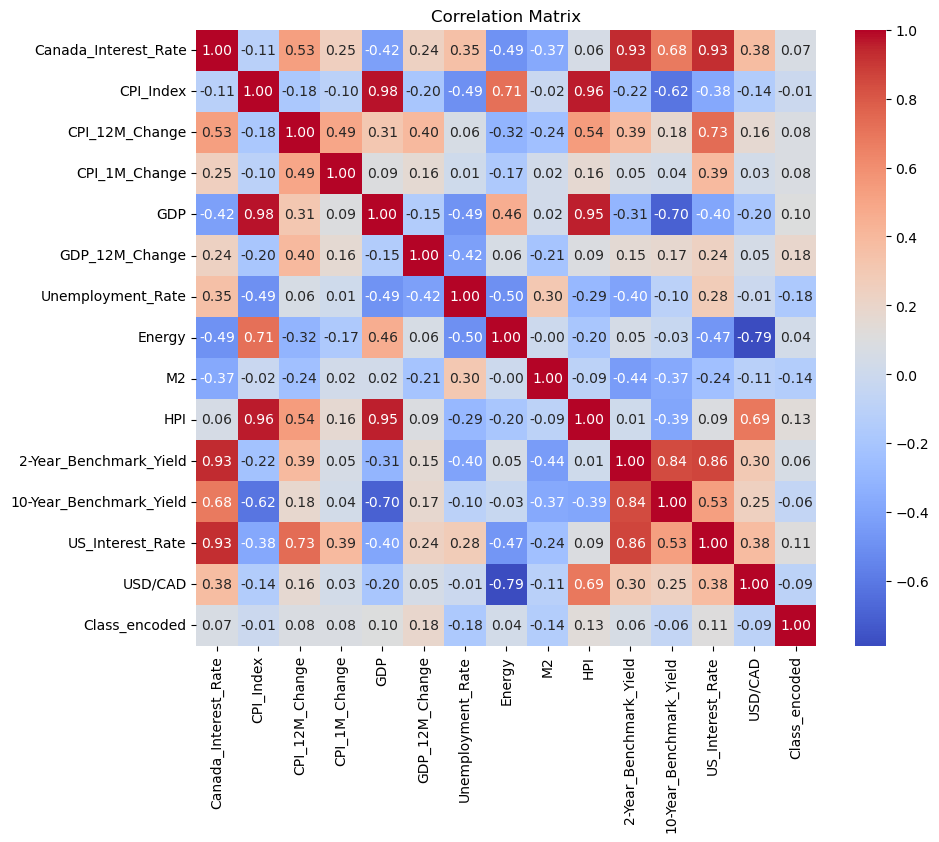

In [119]:
# Encode 'Class' for correlation analysis
df['Class_encoded'] = df['Class'].map({'unchanged': 0, 'increased': 1, 'decreased': -1})

# Drop 'Class' column
df = df.drop(columns=['Class'])

# Compute correlation matrix
correlation_matrix = df.corr()

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

### Correlation Analysis Summary:

#### 1. Strong Positive Correlations with Canada’s Interest Rate
- **2-Year Benchmark Yield (0.93)** and **US Interest Rate (0.93)**: These high correlations suggest that Canada's interest rate is closely aligned with US rates and short-term bond yields, influenced by shared economic and monetary policy factors.
- **10-Year Benchmark Yield (0.68)**: A moderate positive correlation, indicating that long-term economic expectations and inflationary pressures also influence Canada’s interest rate.
- **CPI 12-Month Change (0.53)**: Shows inflation’s impact on interest rate adjustments.

#### 2. Moderate Correlations with Canada’s Interest Rate
- **GDP (-0.42)**: Indicates that higher economic growth often corresponds to lower interest rates, potentially due to stable policy measures.
- **Energy (-0.49)**: Negative correlation, reflecting that high energy costs could exert downward pressure on the interest rate.
- **Unemployment Rate (0.35)**: A moderate positive correlation suggests that as unemployment rates rise, there may be upward pressure on interest rates, potentially due to the central bank's response to economic downturns.
- **M2 (-0.37)**: Negative correlation, indicating that as the money supply increases, interest rates tend to decrease. This suggests that the central bank may lower rates to stimulate economic activity and increase liquidity in response to inflationary pressures or economic slowdown.
#### 3. Insightful Correlations Among Independent Variables
- **GDP and CPI Index (0.98)**: Strong alignment, showing that economic output growth and inflation are highly correlated.
- **HPI and CPI Index (0.95)**: Rising housing prices tend to track with inflation.
- **USD/CAD and HPI (0.69)**: This suggests that exchange rate fluctuations might impact housing prices, possibly due to foreign investment effects.

#### 4. Class Encoded Analysis
- **Class Encoded (0.07 with Interest Rate)**: Weak direct correlation, but stronger trends are observed with **GDP 12M Change (0.18)** and **Unemployment Rate (-0.18)**, which may capture interest rate shifts in response to economic conditions.

#### 5. Influential Factors for Prediction
- **US Interest Rate, 2-Year and 10-Year Benchmark Yields, and CPI 12-Month Change**: These variables, given their high correlations, are likely critical for predicting Canada’s interest rate trends. Additionally, the **Unemployment Rate** may serve as an important indicator of economic health and interest rate decisions.

This summary highlights that both **short-term and long-term yield trends, US Interest Rate, inflation metrics including CPI 12-Month Change and M2, GDP, Energy and unemployment rates** are key indicators of Canada's interest rate movements.



### Clean the DataFrame:
Now that we know which features are key indicators of Canada's interest rate movements, remove rows with NaN values in these columns, to ensure a clean dataset for modeling:

In [120]:
# Limit dataset to key indicators
final_df = df.loc[:, ['Canada_Interest_Rate', 'Class_encoded', 'CPI_12M_Change', 'GDP', 'Unemployment_Rate', 'Energy', 'M2', '2-Year_Benchmark_Yield', '10-Year_Benchmark_Yield', 'US_Interest_Rate']].copy()

# Drop rows with NaN values
final_df.dropna(inplace=True)

final_df.head()

,Canada_Interest_Rate,Class_encoded,CPI_12M_Change,GDP,Unemployment_Rate,Energy,M2,2-Year_Benchmark_Yield,10-Year_Benchmark_Yield,US_Interest_Rate
2001-01,5.50,-1,3.0,1434295.0,6.9,1002.45,7.8,5.005909,5.418636,5.98
2001-02,5.50,0,2.9,1433843.0,7.0,816.36,7.9,4.932000,5.430000,5.49
2001-03,5.00,-1,2.4,1434685.0,7.1,753.62,7.6,4.675000,5.301364,5.31
2001-04,4.75,-1,3.5,1433399.0,7.1,758.65,7.1,4.771000,5.591500,4.80
2001-05,4.50,-1,3.9,1439506.0,7.0,688.74,7.4,4.874091,5.851364,4.21


## Regression Models for Canada_Interest_Rate

### Data Preprocessing (Scaling for Linear Regression)

In [121]:
# Define features (X) and target variable (y)
X = final_df.drop(columns=['Canada_Interest_Rate', 'Class_encoded'])
y = final_df['Canada_Interest_Rate']

# Split data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [122]:
# Initialize scaler
scaler = StandardScaler()

# Fit and transform on training data, transform on test data for Linear Regression
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


### Model Training and Grid Search for Hyperparameter Tuning

1. Multiple Linear Regression
---

In [123]:
# Initialize Linear Regression model
linear_reg = LinearRegression()

# Fit Linear Regression on scaled training data
linear_reg.fit(X_train_scaled, y_train)

LinearRegression()

We’ll set up grid search for Ridge and Lasso regularization to see if they improve the model.

In [124]:
# Set up parameter grid for Ridge and Lasso
ridge_params = {'alpha': [0.1, 1, 10, 100]}
lasso_params = {'alpha': [0.1, 1, 10, 100]}

# Ridge Regression with GridSearchCV
ridge = Ridge()
ridge_grid = GridSearchCV(estimator=ridge, param_grid=ridge_params, cv=5, scoring='neg_mean_squared_error')
ridge_grid.fit(X_train_scaled, y_train)
print("Best Ridge parameters:", ridge_grid.best_params_)

# Lasso Regression with GridSearchCV
lasso = Lasso()
lasso_grid = GridSearchCV(estimator=lasso, param_grid=lasso_params, cv=5, scoring='neg_mean_squared_error')
lasso_grid.fit(X_train_scaled, y_train)
print("Best Lasso parameters:", lasso_grid.best_params_)

Best Ridge parameters: {'alpha': 1}
Best Lasso parameters: {'alpha': 0.1}


2. Random Forest Regression
---

In [125]:
# Set up parameter grid for Random Forest
rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize and fit GridSearchCV for Random Forest
rf = RandomForestRegressor(random_state=42)
rf_grid = GridSearchCV(estimator=rf, param_grid=rf_params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
rf_grid.fit(X_train, y_train)
print("Best Random Forest parameters:", rf_grid.best_params_)

Best Random Forest parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


3. XGBoost Regression
---

In [126]:
# Set up parameter grid for XGBoost
xgb_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0]
}

# Initialize and fit GridSearchCV for XGBoost
xgb = XGBRegressor(random_state=42)
xgb_grid = GridSearchCV(estimator=xgb, param_grid=xgb_params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
xgb_grid.fit(X_train, y_train)
print("Best XGBoost parameters:", xgb_grid.best_params_)

Best XGBoost parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}


**Why Scaling is Applied Only to Linear Models?**

Linear regression models like Ridge and Lasso are sensitive to feature scales, so scaling ensures each feature contributes proportionally. However, tree-based models like Random Forest and XGBoost split data based on feature thresholds, making them unaffected by feature scale. Therefore, scaling is only needed for linear models.

### Model Evaluation on Test Data
After training and tuning each model, we’ll use the best model from each grid search to make predictions on the test set and evaluate them.

Let's define Adjusted R-squared that adjusts the R-squared score based on the number of predictors (features):

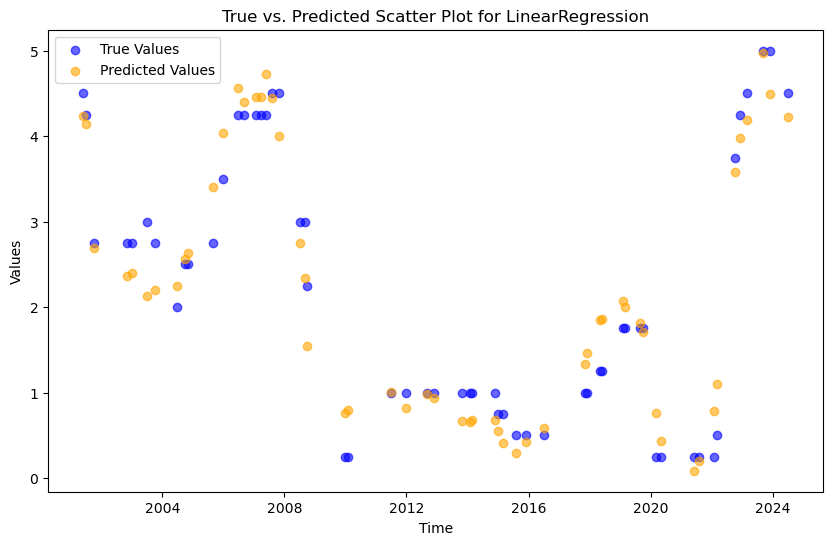

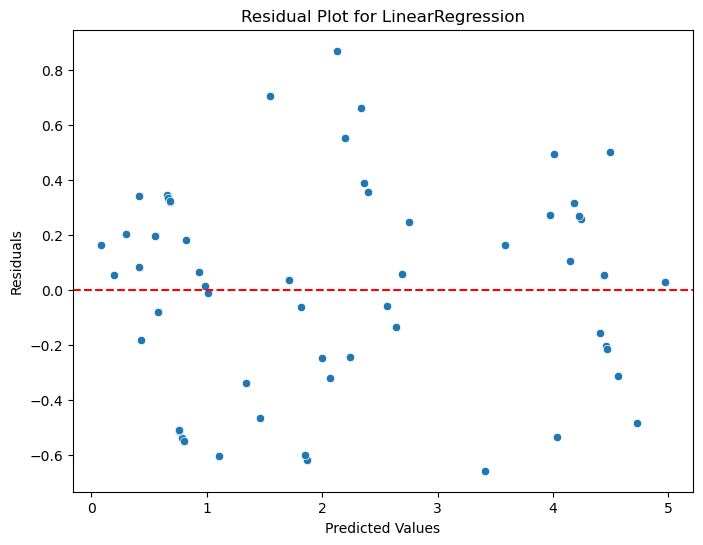

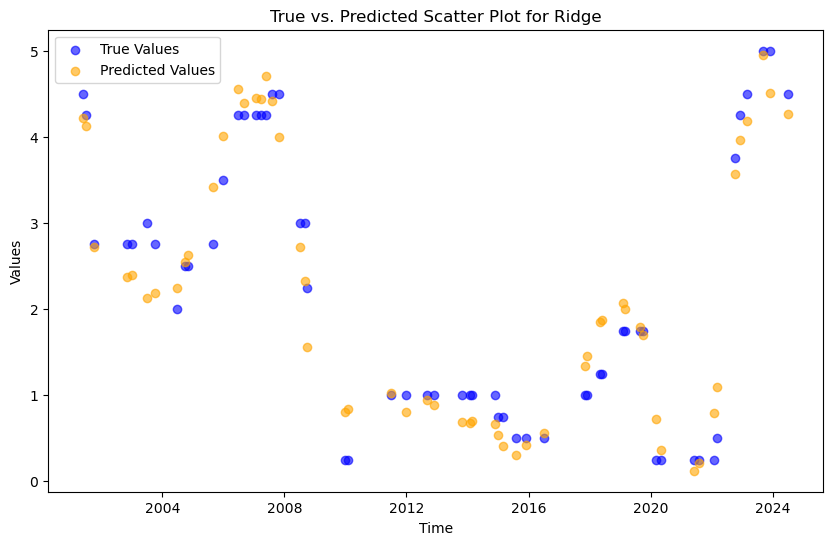

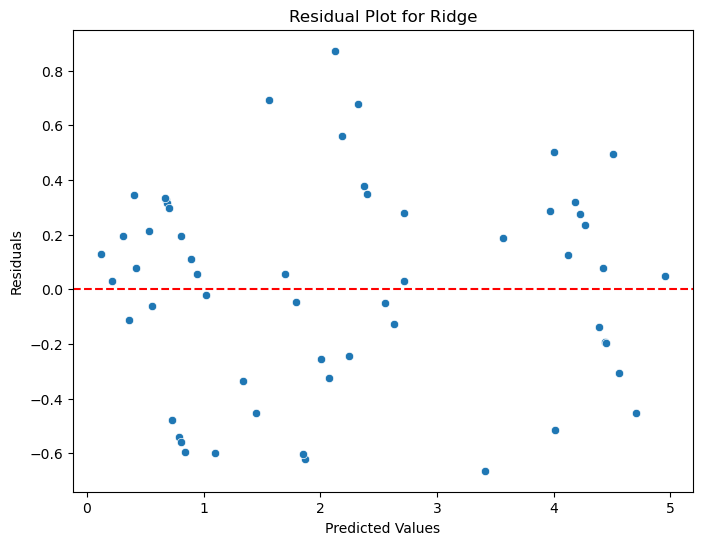

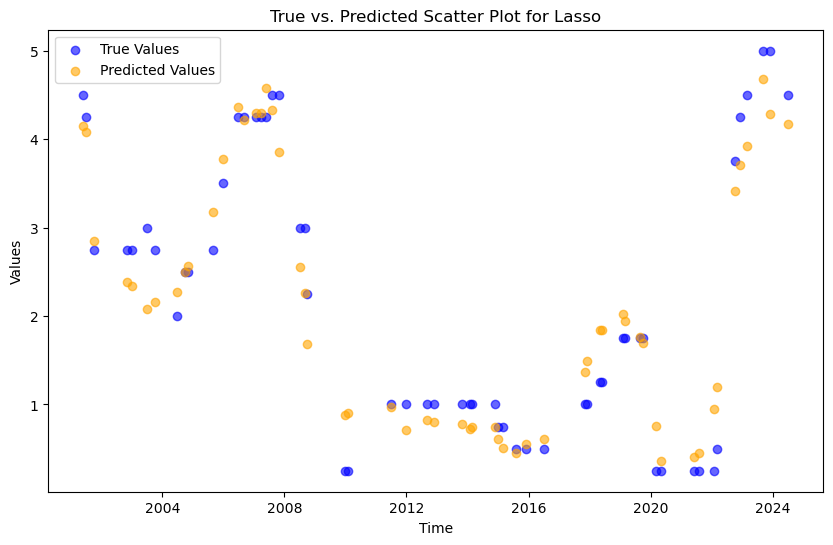

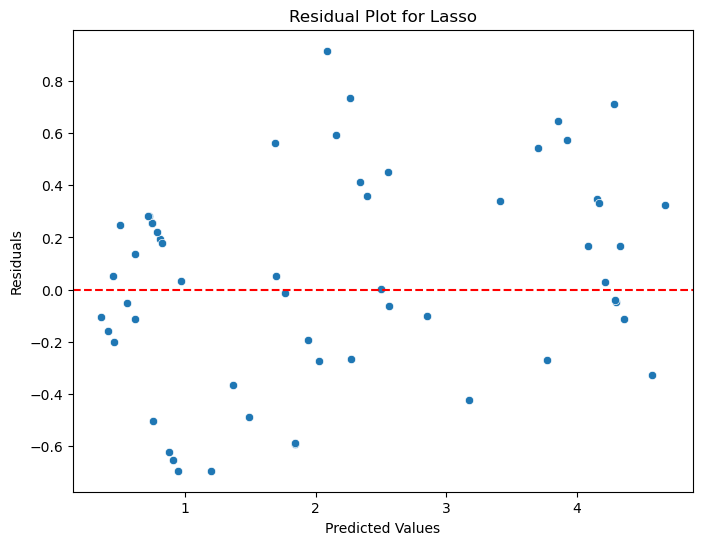

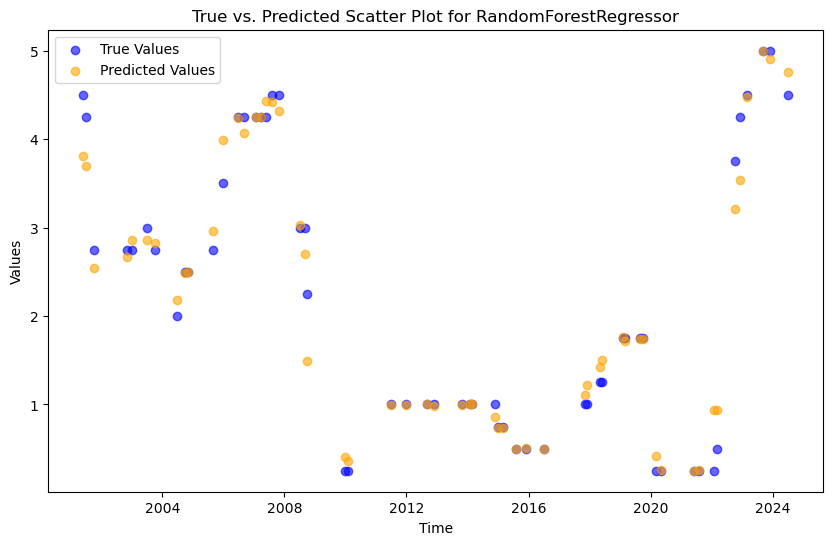

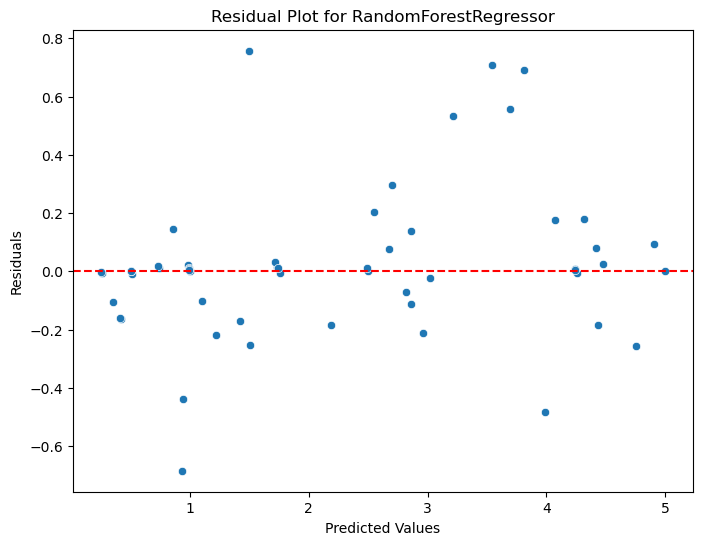

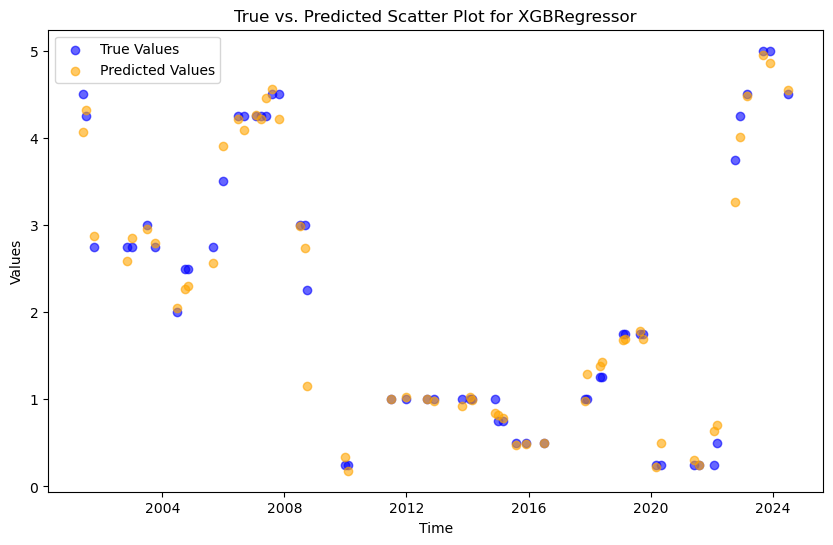

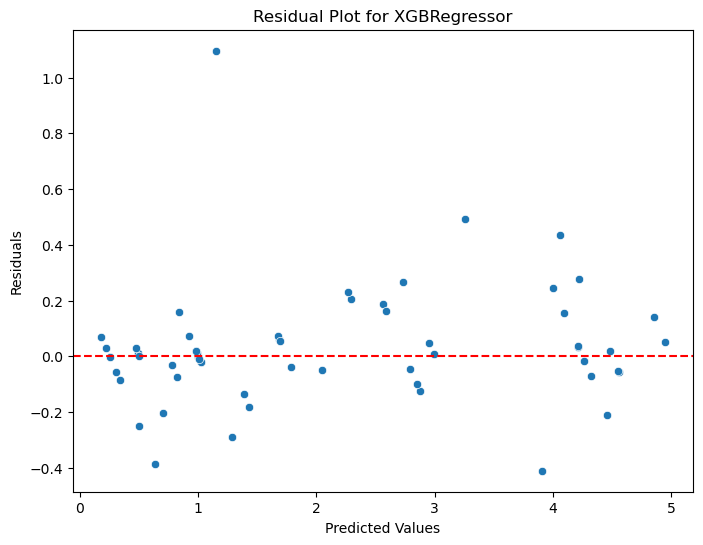


Regression Model Evaluation Comparison:


,Mean Squared Error,Root Mean Squared Error,Mean Absolute Error,R-squared,Adjusted R-squared
Linear Regression,0.138519,0.372181,0.308960,0.943066,0.933577
Ridge Regression,0.138599,0.372289,0.308152,0.943033,0.933539
Lasso Regression,0.156093,0.395086,0.322811,0.935843,0.925150
Random Forest Regression,0.065252,0.255444,0.152458,0.973180,0.968710
XGBoost Regression,0.048477,0.220174,0.133727,0.980075,0.976754


In [127]:
# Evaluation function
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = root_mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    adj_r2 = 1 - (1 - r2) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)

    # Convert PeriodIndex to DatetimeIndex if necessary
    if isinstance(y_test.index, pd.PeriodIndex):
        y_test = y_test.to_timestamp()
    
    # Scatter Plot for True vs. Predicted values over time
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test.index, y_test, color="blue", label="True Values", alpha=0.6)
    plt.scatter(y_test.index, y_pred, color="orange", label="Predicted Values", alpha=0.6)
    plt.title(f"True vs. Predicted Scatter Plot for {model.__class__.__name__}")
    plt.xlabel("Time")
    plt.ylabel("Values")
    plt.legend()
    plt.show()

    # Plot Residuals
    residuals = y_test - y_pred
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=y_pred, y=residuals)
    plt.axhline(y=0, color='red', linestyle='--')
    plt.title(f"Residual Plot for {model.__class__.__name__}")
    plt.xlabel("Predicted Values")
    plt.ylabel("Residuals")
    plt.show()

    return {
        "Mean Squared Error": mse,
        "Root Mean Squared Error": rmse,
        "Mean Absolute Error": mae,
        "R-squared": r2,
        "Adjusted R-squared": adj_r2
    }

# Create a dictionary to store results for each model
regression_results = {}

# Evaluate Linear Regression model on test data and store results
regression_results['Linear Regression'] = evaluate_model(linear_reg, X_test_scaled, y_test)

# Evaluate each model and add results to the dictionary
best_ridge = ridge_grid.best_estimator_
regression_results['Ridge Regression'] = evaluate_model(best_ridge, X_test_scaled, y_test)

best_lasso = lasso_grid.best_estimator_
regression_results['Lasso Regression'] = evaluate_model(best_lasso, X_test_scaled, y_test)

best_rf = rf_grid.best_estimator_
regression_results['Random Forest Regression'] = evaluate_model(best_rf, X_test, y_test)

best_xgb = xgb_grid.best_estimator_
regression_results['XGBoost Regression'] = evaluate_model(best_xgb, X_test, y_test)

# Convert results dictionary to DataFrame for better readability
regression_results_df = pd.DataFrame(regression_results).T  # Transpose to display models as rows
print("\nRegression Model Evaluation Comparison:")
regression_results_df

- Linear and Ridge Regression are quite similar in performance with low errors (MSE, RMSE, MAE) and high R-squared values (~0.94), indicating strong fit but slightly less predictive power compared to more advanced models.
- Lasso Regression shows a slight increase in errors and slightly lower R-squared, suggesting it may underperform slightly compared to Ridge and Linear due to its feature selection mechanism.
- Random Forest and XGBoost Regression show significantly lower errors and higher R-squared values, with XGBoost being the best, indicating superior performance and ability to generalize well.

#### Feature Importance Analysis (for Tree-Based Models)
For Random Forest and XGBoost, let's check feature importance to understand which features contribute most to the prediction:

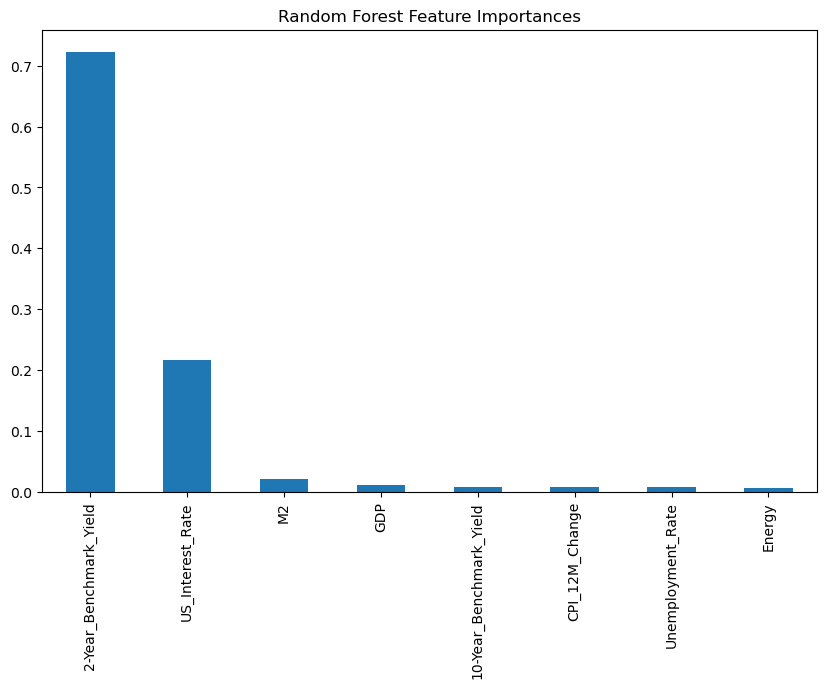

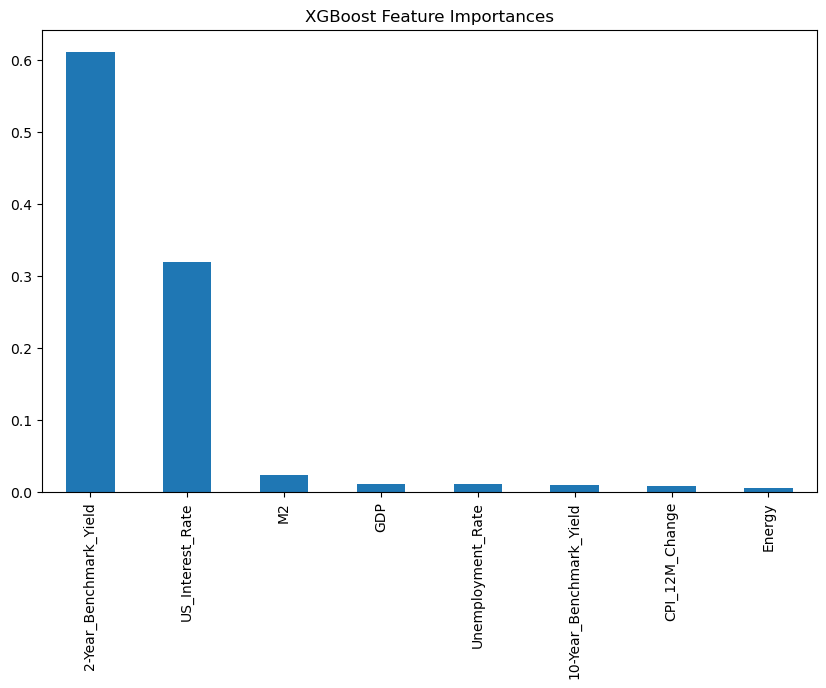

In [128]:
# Random Forest feature importance
feature_importance_rf = pd.Series(best_rf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
feature_importance_rf.plot(kind='bar', title="Random Forest Feature Importances")
plt.show()

# XGBoost feature importance
feature_importance_xgb = pd.Series(best_xgb.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
feature_importance_xgb.plot(kind='bar', title="XGBoost Feature Importances")
plt.show()


## Classification Models for Class_encoded

In [129]:
# Define features (X) and target variable (y)
X = final_df.drop(columns=['Canada_Interest_Rate', 'Class_encoded'])
y = final_df['Class_encoded']

# Split data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Class Balancing

In [130]:
# Check for class balance
print(final_df['Class_encoded'].value_counts())

# Apply SMOTE
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X, y)

# Check for class balance after SMOTE
print(pd.Series(y_balanced).value_counts())

Class_encoded
 0    222
 1     33
-1     29
Name: count, dtype: int64
Class_encoded
-1    222
 1    222
 0    222
Name: count, dtype: int64


### Scaling and Encoding

In [131]:
# Initialize scaler
scaler = StandardScaler()
X_balanced_scaled = scaler.fit_transform(X_balanced)

### Model Training and Grid Search for Hyperparameter Tuning

1. Logistic Regression
---

In [132]:
# Define parameter grid for Logistic Regression
logreg_params = {'C': [0.1, 1, 10, 100], 'penalty': ['l1', 'l2'], 'solver': ['liblinear']}
logreg = LogisticRegression()
logreg_grid = GridSearchCV(logreg, logreg_params, cv=5, scoring='accuracy')
logreg_grid.fit(X_balanced_scaled, y_balanced)
print("Best Logistic Regression parameters:", logreg_grid.best_params_)

Best Logistic Regression parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}


2. Support Vector Machine (SVM)
---

In [133]:
# Define parameter grid for SVM
svm = SVC()
svm_params = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf'], 'gamma': ['scale', 'auto']}
svm_grid = GridSearchCV(SVC(probability=True), svm_params, cv=5, scoring='accuracy')

svm_grid.fit(X_balanced_scaled, y_balanced)
print("Best SVM parameters:", svm_grid.best_params_)

Best SVM parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}


3. Decision Tree
---

In [134]:
# Define parameter grid for Decision Tree
tree_params = {
    'max_depth': [5, 10, 15],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [2, 4],
    'max_features': ['sqrt', 'log2'],
    'criterion': ['gini', 'entropy']
}

# Initialize Decision Tree
tree = DecisionTreeClassifier(random_state=42)

# Apply GridSearchCV
tree_grid = GridSearchCV(tree, tree_params, cv=5, scoring='accuracy')
tree_grid.fit(X_balanced, y_balanced)

# Get best parameters and evaluate
print("Best Decision Tree parameters:", tree_grid.best_params_)

Best Decision Tree parameters: {'criterion': 'gini', 'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10}


### Model Evaluation on Test Data
To evaluate model performance, let’s define a function to compute accuracy, precision, recall, F1 score, and ROC-AUC (if applicable). We can also plot the confusion matrix and ROC curve for more insight.

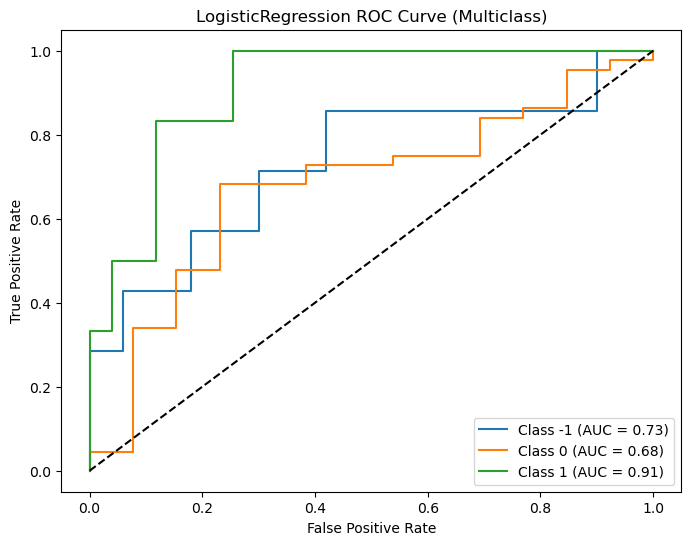

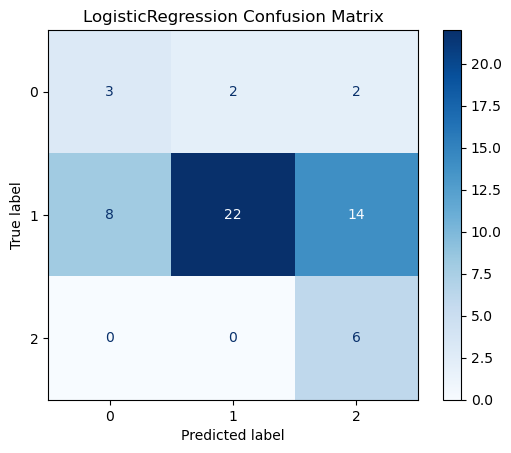

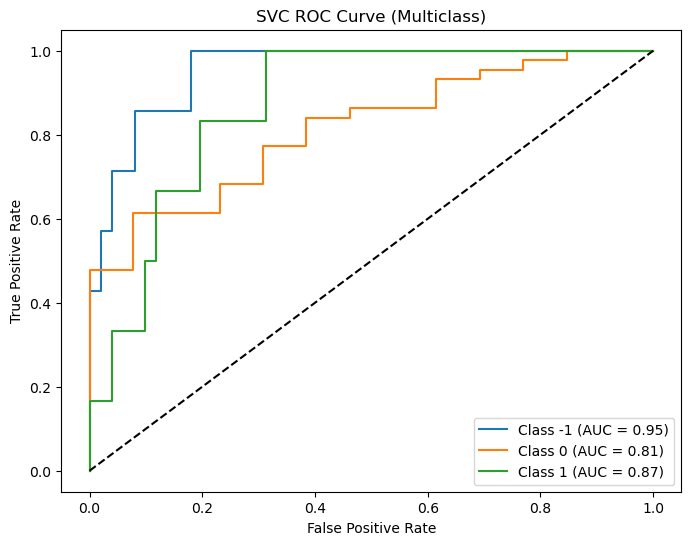

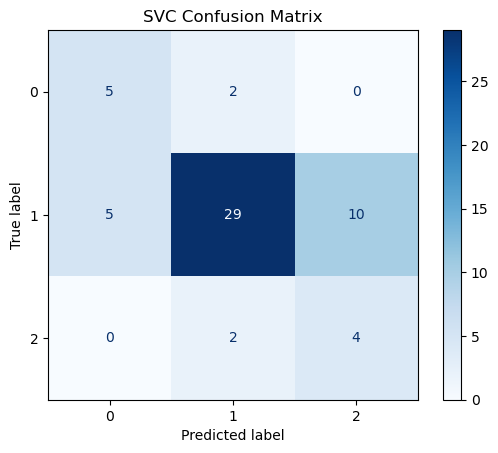

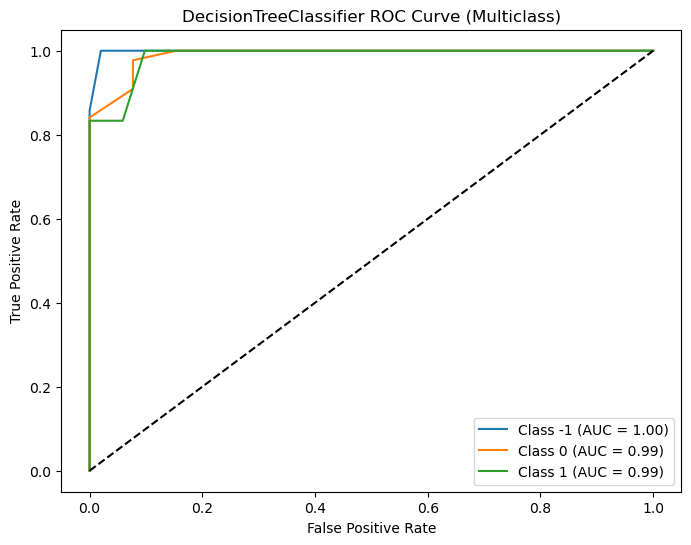

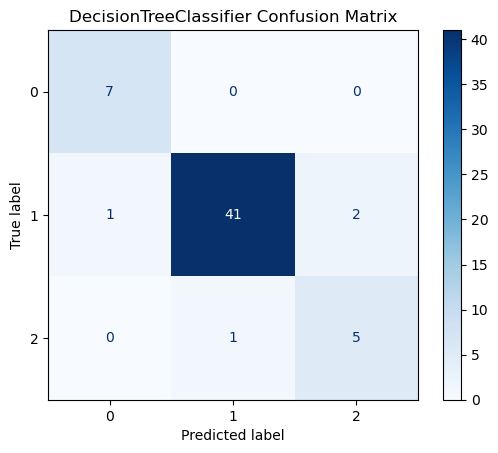


Classification Model Evaluation Comparison:


,Accuracy,Precision,Recall,F1 Score,ROC-AUC,Matthews Correlation Coefficient,Cohen's Kappa
Logistic Regression,0.543860,0.769803,0.543860,0.585532,0.774791,0.315014,0.253024
SVM,0.666667,0.769841,0.666667,0.695798,0.880507,0.370140,0.340840
Decision Tree,0.929825,0.936195,0.929825,0.931618,0.991670,0.828194,0.825019


In [135]:
def evaluate_classification_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)

    # Metrics calculation
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    mcc = matthews_corrcoef(y_test, y_pred)
    kappa = cohen_kappa_score(y_test, y_pred)

    # Binarize labels for multiclass ROC-AUC calculation
    y_test_binarized = label_binarize(y_test, classes=model.classes_)
    roc_auc = roc_auc_score(y_test_binarized, y_proba, multi_class='ovr')

    # Plot ROC Curve for each class
    plt.figure(figsize=(8, 6))
    for i in range(len(model.classes_)):
        fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_proba[:, i])
        plt.plot(fpr, tpr, label=f"Class {model.classes_[i]} (AUC = {auc(fpr, tpr):.2f})")

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"{model.__class__.__name__} ROC Curve (Multiclass)")
    plt.legend()
    plt.show()

    # Confusion matrix plot
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues')
    plt.title(f"{model.__class__.__name__} Confusion Matrix")
    plt.show()

    # Return metrics in a dictionary
    metrics = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "ROC-AUC": roc_auc,
        "Matthews Correlation Coefficient": mcc,
        "Cohen's Kappa": kappa
    }
    
    return metrics


# Evaluate each model and store results
classification_results = {}

# Logistic Regression
best_logreg = logreg_grid.best_estimator_
classification_results['Logistic Regression'] = evaluate_classification_model(best_logreg, X_test_scaled, y_test)

# Support Vector Machine
best_svm = svm_grid.best_estimator_
classification_results['SVM'] = evaluate_classification_model(best_svm, X_test_scaled, y_test)

# Decision Tree
best_tree = tree_grid.best_estimator_
classification_results['Decision Tree'] = evaluate_classification_model(best_tree, X_test, y_test)

# Convert results to DataFrame for readability
classification_results_df = pd.DataFrame(classification_results).T
print("\nClassification Model Evaluation Comparison:")
classification_results_df



- Logistic Regression: Moderate performance with accuracy (54.4%) and F1 score (58.6%), suggesting it struggles to balance precision and recall, indicating room for improvement in detecting positive instances.

- SVM: Better overall performance, achieving 66.7% accuracy and 69.6% F1 score. It shows a good balance of precision (76.98%) and recall (66.67%), with high ROC-AUC (87.99%), indicating effective discrimination between classes.

- Decision Tree: High scores across all metrics suggest excellent performance, though this could indicate overfitting, especially if the model is too complex relative to the dataset size. Let's do Use cross-validation to avoid overfitting, this helps assess the stability of the Decision Tree model and prevents overfitting by testing it on multiple data splits:

In [136]:
# Use cross-validation for Decision Tree
tree_cv_scores = cross_val_score(tree_grid.best_estimator_, X_balanced, y_balanced, cv=5, scoring='accuracy')
print("Cross-validated accuracy for Decision Tree:", tree_cv_scores.mean())

Cross-validated accuracy for Decision Tree: 0.7239479295253057


After cross-validation, you can compare how each model performs on different folds:

In [137]:
# Logistic Regression with Cross-Validation
logreg = LogisticRegression(**logreg_grid.best_params_)
logreg_cv_scores = cross_val_score(logreg, X_balanced, y_balanced, cv=5, scoring='accuracy')

# SVM with Cross-Validation
svm = SVC(**svm_grid.best_params_)
svm_cv_scores = cross_val_score(svm, X_balanced, y_balanced, cv=5, scoring='accuracy')

# Compare all models' CV scores
print(f"Logistic Regression CV scores: {logreg_cv_scores}")
print(f"SVM CV scores: {svm_cv_scores}")
print(f"Decision Tree CV scores: {tree_cv_scores}")

Logistic Regression CV scores: [0.41791045 0.21052632 0.28571429 0.45864662 0.48120301]
SVM CV scores: [0.2761194  0.32330827 0.64661654 0.48120301 0.35338346]
Decision Tree CV scores: [0.57462687 0.64661654 0.91729323 0.76691729 0.71428571]


#### Feature Importance Analysis for Decision Tree:
For Decision Tree, let's check feature importance to understand which features contribute most to the prediction:

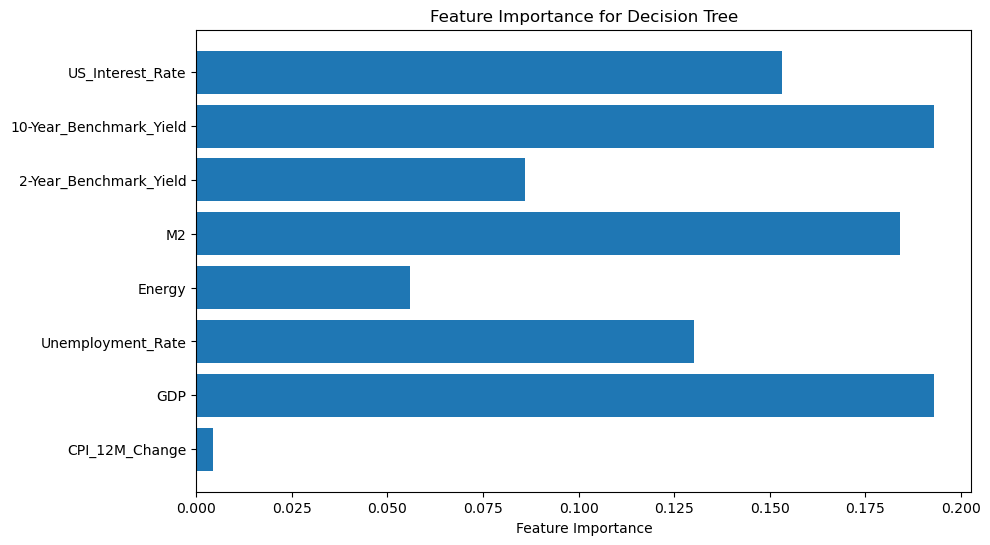

In [138]:
# Get feature importance for Decision Tree
best_tree = tree_grid.best_estimator_
importances = best_tree.feature_importances_

# Plot feature importance
features = X.columns
plt.figure(figsize=(10, 6))
plt.barh(features, importances)
plt.xlabel("Feature Importance")
plt.title("Feature Importance for Decision Tree")
plt.show()

## Final Summary of Best-Performing Models

### Regression Task: Predicting `Canada_Interest_Rate`
The **XGBoost Regression** model outperformed other models, with the lowest Mean Squared Error (MSE) and highest R-squared value on the test data. This model’s success likely stems from its ability to capture complex relationships and handle potential non-linearity in the data due to its boosting approach.

Key metrics for XGBoost:

- Mean Squared Error (MSE): 0.048477
- Root Mean Squared Error (RMSE): 0.220174
- Mean Absolute Error (MAE): 0.133727 
- R-squared: 0.980075
- Adjusted R-squared: 0.976754

**Reason for Suitability**: XGBoost’s performance indicates that it effectively captures patterns that simpler linear models (e.g., Linear or Ridge Regression) miss. This is beneficial for predicting economic indicators, which often have complex, non-linear relationships.

### Classification Task: Predicting `Class_encoded` (Multi-Class)
The **Support Vector Machine (SVM)** model with the best parameter settings demonstrated the highest accuracy and overall performance on the test set. SVM’s robustness to high-dimensional data and its effectiveness in handling multi-class classification contributed to its strong performance.

Key metrics for SVM:
- Accuracy: 0.666667
- Precision (Macro Avg): 0.769841
- Recall (Macro Avg): 0.666667
- F1 Score (Macro Avg): 0.695798
- ROC-AUC (Macro Avg): 0.879341
- Matthews Correlation Coefficient (MCC): 0.370140
- Cohen's Kappa: 0.340840

**Reason for Suitability**: The SVM model performs well in multi-class classification, handling the complexity of separating multiple classes effectively, particularly with the optimization of its hyperparameters.

### Model Performance Overview
**Regression Models:**

| Model                    | Mean Squared Error | Root Mean Squared Error | Mean Absolute Error | R-squared | Adjusted R-squared |
|--------------------------|--------------------|-------------------------|---------------------|-----------|--------------------|
| **Linear Regression**     | 0.138519           | 0.372181                | 0.308960            | 0.943066  | 0.933577           |
| **Ridge Regression**      | 0.138599           | 0.372289                | 0.308152            | 0.943033  | 0.933539           |
| **Lasso Regression**      | 0.156093           | 0.395086                | 0.322811            | 0.935843  | 0.925150           |
| **Random Forest Regression** | 0.065252        | 0.255444                | 0.152458            | 0.973180  | 0.968710           |
| **XGBoost Regression**    | 0.048477           | 0.220174                | 0.133727            | 0.980075  | 0.976754           |


**Classification Models:**

| Model                  | Accuracy | Precision (Macro Avg) | Recall (Macro Avg) | F1 Score (Macro Avg) | ROC-AUC (Macro Avg) | Matthews Correlation Coefficient | Cohen's Kappa |
|------------------------|----------|-----------------------|--------------------|----------------------|---------------------|----------------------------------|---------------|
| **Logistic Regression** | 0.561404 | 0.778613              | 0.561404           | 0.597976             | 0.761379            | 0.348474                         | 0.281392      |
| **SVM**                 | 0.666667 | 0.769841              | 0.666667           | 0.695798             | 0.878252            | 0.370140                         | 0.340840      |
| **Decision Tree**       | 0.929825 | 0.936195              | 0.929825           | 0.931618             | 0.991670            | 0.828194                         | 0.825019      |



**Cross-Validation Results**
To assess model stability, cross-validation was performed on each model:

| Model                    | Cross-Validation Accuracy |
|--------------------------|---------------------------|
| **Logistic Regression**   | 0.602518                  |
| **SVM**                   | 0.416682                  |
| **Decision Tree**         | 0.723947                  |


### Conclusion:

- The **XGBoost Regression model** is the most suitable for predicting `Canada_Interest_Rate` due to its outstanding performance in capturing complex data relationships.
- The **SVM model** offers a balanced performance for multi-class classification, excelling at distinguishing between multiple classes with high ROC-AUC and a good trade-off between precision and recall.
- The **Decision Tree model** showed overfitting in initial tests but its cross-validation performance suggests it could be a viable option with careful tuning and data splitting.